In [94]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

In [95]:
# read in master file
df_orig=pd.read_excel("ContouringAndPlanningTimeEst.xlsx")
# exclude planned delays
df_orig=df_orig[df_orig['Category_x']!='Planned Delay 3']
df_orig.head()


,Unnamed: 0,MRN,CreatedDate,SiteGroup,Sitegroup_y,Category_x,SimApptDt,GTV/CTVPromtDate,GTV/CTVCompleteDate,ReviewDatePlaner,...,ContourDur+1,earliest plan finish or tx starrt,TestPlanDur,Tx-Contour,PlanDur+1,ProgressReviewWait,PlannerReviewWait,Unnamed: 21,TltDose,TxFracs
0,0,7287,2019-02-20,GENITOURINARY(GU),GENITOURINARY(GU),Urgent 2,2019-2-20,2019-02-20,2019-02-20,NaT,...,1.0,2019-02-20 00:00:00,1.0,2.0,1.0,NaN,NaN,NaN,1600.0,2.0
1,1,7287,2019-05-29,GENITOURINARY(GU),GENITOURINARY(GU),Standard 3,2019-6-5,2019-06-05,2019-06-05,NaT,...,1.0,2019-06-05 00:00:00,1.0,1.0,1.0,NaN,NaN,NaN,2400.0,3.0
2,2,7287,2019-07-31,GENITOURINARY(GU),GENITOURINARY(GU),Urgent 2,2019-7-31,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,10.0
3,3,7287,2019-08-28,GENITOURINARY(GU),GENITOURINARY(GU),Urgent 2,2019-8-28,NaT,NaT,NaT,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1600.0,2.0
4,4,10287,2019-04-17,BREAST,BREAST,Standard 3,2019-4-30,2019-05-01,2019-05-01,2019-05-07,...,1.0,2019-05-07 00:00:00,5.0,9.0,1.0,4.0,5.0,5.0,4240.0,16.0


In [96]:
df_orig.shape


(8169, 26)

In [97]:
df_orig['Category_x'].unique()


array(['Urgent 2', 'Standard 3', 'Emergency 1'], dtype=object)

In [99]:
df_orig['PlanDur'] = df_orig["TestPlanDur"] - 1

## Pre-treatment steps time analysis

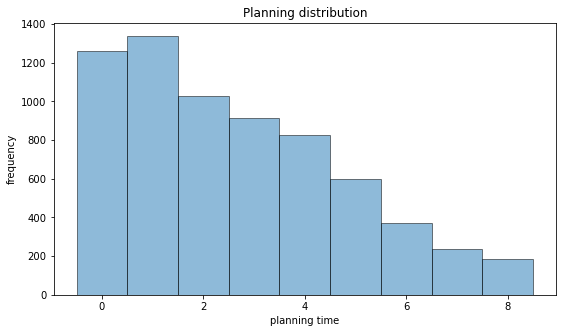

In [179]:
plt.figure(figsize=[9,5])
bins = range(0,10)

y = df_orig["PlanDur"]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('planning time')
plt.ylabel('frequency')
plt.title('Planning distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Wait time > 14 days:

In [101]:
df_exceed=df_orig[df_orig['WaitTime']>14]
df_exceed.shape

(2881, 27)

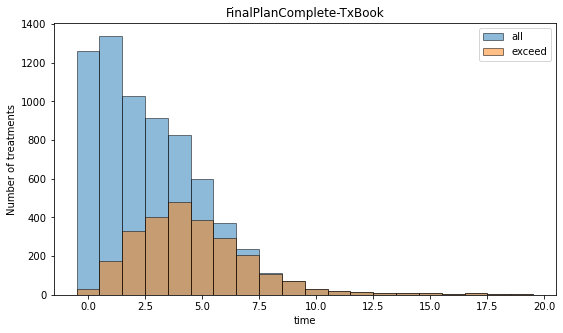

In [102]:
plt.figure(figsize=[9,5])
bins = range(0,21)

x = df_orig[df_orig['PlanDur']<20]['PlanDur']
y = df_exceed[df_exceed['PlanDur']<20]['PlanDur']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('FinalPlanComplete-TxBook')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Contouring wait time seems to be negligible:

In [9]:
preTxDur[preTxDur['ContourWait'].dt.days>1].groupby('SiteGroup').count()

NameError: name 'preTxDur' is not defined

In [ ]:
df_exceed.columns

In [ ]:
df_exceed['ContourWait']=df_exceed['ContourWait'].dt.days
y = df_exceed[(df_exceed['ContourWait']>=-20)&(df_exceed['ContourWait']<=15)].ContourWait
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')

plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time for Contour after CT appt')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Planning Time:

In [180]:
# remove outliers by contouring time
df_orig['z_score_contour']=stats.zscore(df_orig['PlanDur'])
df_orig.loc[df_orig['z_score_contour'].abs()<=3]

,Unnamed: 0,MRN,CreatedDate,SiteGroup,Sitegroup_y,Category_x,SimApptDt,GTV/CTVPromtDate,GTV/CTVCompleteDate,ReviewDatePlaner,...,TestPlanDur,Tx-Contour,PlanDur+1,ProgressReviewWait,PlannerReviewWait,Unnamed: 21,TltDose,TxFracs,PlanDur,z_score_contour


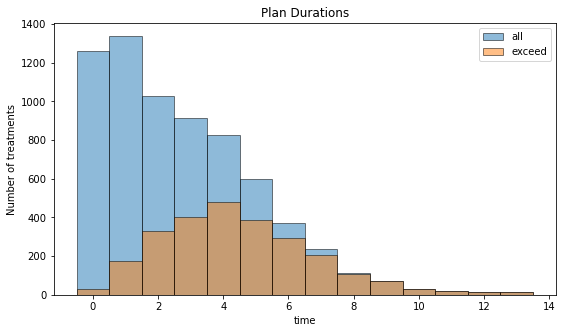

In [181]:
plt.figure(figsize=[9,5])
bins = range(0,15)

x = df_orig[(df_orig['PlanDur']>=-20)&(df_orig['PlanDur']<=20)]['PlanDur']
y = df_exceed[(df_exceed['PlanDur']>=-20)&(df_exceed['PlanDur']<=20)]['PlanDur']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Plan Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Yearly Planning trends

In [ ]:
df['Sitegroup_y'].unique()

In [ ]:
# breast, 
breast_contour = {}
years_month_list =[]
df_breast = df[df['Sitegroup_y']=='BREAST']
for y in range(2010, 2021): #2010-2020
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['PlanDur2'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.plot(x,y)
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title("Contouring durations for Breast patients");

In [ ]:
def remove_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


In [ ]:
def ContourDur_trend(sitegroup):
    site_contour = {}
    years_month_list =[] # ContourComplete - Sim
    years_month_list_2 =[] # ContourDur = ContourComplete - ContourPromt
    years_month_list_3 =[] # TxApptBook - Sim
    df_site = preTxDur[preTxDur['Sitegroup_y']==sitegroup]

    for y in range(2015, 2021): #2015-2020
        df_y = df_site[df_site['CreatedDate'].dt.year == y]
        month_list=[]
        for m in range(1,13):
            #remove outliers in each month
            monthly_data = df_y[df_y['CreatedDate'].dt.month == m]['PlanDur']
            month_avg = remove_outliers(monthly_data).mean()
            monthly_data_2 = df_y[df_y['CreatedDate'].dt.month == m]['PlanDur2']
            month_avg_2 = remove_outliers(monthly_data_2).mean()
            #monthly_data_3 = df_y[df_y['CreatedDate'].dt.month == m]['TxApptBook-Sim']
            #month_avg_3 = remove_outliers(monthly_data_3).mean()
        
        
            years_month_list.append(month_avg)
            years_month_list_2.append(month_avg_2)
            #years_month_list_3.append(month_avg_3)
        
            month_list.append(month_avg)
            site_contour[y] = month_list
            #print(site_contour[2018])

    x = range(1,73)
    y = years_month_list
    y2 = years_month_list_2
    #y3 = years_month_list_3
    plt.plot(x,y,label='PlanDur')
    plt.plot(x,y2,label='FinalPlanCompl-TxBook')
    #plt.plot(x,y3,label='TxApptBook-Sim')
    plt.legend()
    plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
    plt.title("Mean contouring durations for patients " + sitegroup)
    plt.show();
    

In [ ]:
df['Sitegroup_y'].unique()

In [ ]:
for s in df['Sitegroup_y'].unique():
    if s is not np.nan:
        print(s)
        ContourDur_trend(s)
    

### Planning time estimation model

In [231]:
# use patients meeting the 14 day wait time to estimate normal planning time
df_meet=df_orig[df_orig['WaitTime']<=14]
df_meet.shape

(5288, 28)

In [232]:
df19 = df_meet[pd.to_datetime(df_meet['CreatedDate']).dt.year>=2019]
df19.size

148064

### EDA

In [233]:
features = ['SiteGroup','Category_x','TltDose','TxFracs']
dtf = df_orig[['MRN'] + features + ['PlanDur']]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf['PlanDur']<=25)&(dtf['PlanDur']>=0)]
dtf.head()


,MRN,SiteGroup,Category_x,TltDose,TxFracs,PlanDur
0,7287,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
1,7287,GENITOURINARY(GU),Standard 3,2400.0,3.0,0.0
4,10287,BREAST,Standard 3,4240.0,16.0,4.0
6,12169,GYNAE,Standard 3,2500.0,10.0,4.0
7,15820,BREAST,Standard 3,4240.0,16.0,1.0


In [234]:
target_y="PlanDur"
dtf = df_orig[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
dtf.head()


,SiteGroup,Category_x,TltDose,TxFracs,PlanDur
0,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
1,GENITOURINARY(GU),Standard 3,2400.0,3.0,0.0
4,BREAST,Standard 3,4240.0,16.0,4.0
6,GYNAE,Standard 3,2500.0,10.0,4.0
7,BREAST,Standard 3,4240.0,16.0,1.0


In [235]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
#from lime import lime_tabular

In [236]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
# want to know how many categorical and numerical variables there are and the proportion of missing data.
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

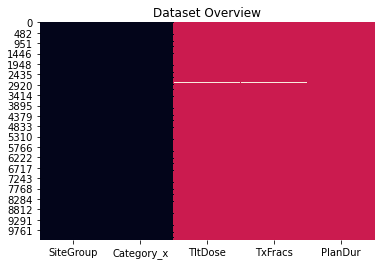

 Categerocial   Numeric   NaN 


In [237]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [238]:
# dtf = dtf.set_index("Id")
dtf = dtf.rename(columns={target_y:"Y"})

#### Visualisation
#### univariate distributions

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


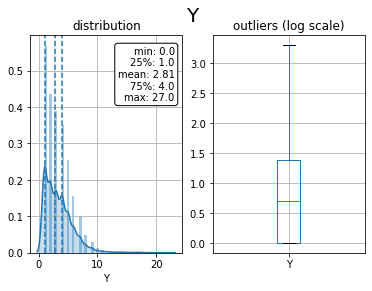

In [190]:
#A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data. 
#box plot to graphically depict data groups through their quartiles.

x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

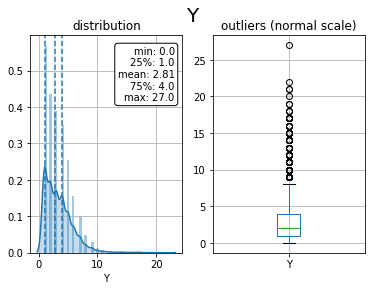

In [191]:
x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].median()) # median
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (normal scale)')
#tmp_dtf = pd.DataFrame(dtf[x])
#tmp_dtf[x] = np.log(tmp_dtf[x])
#tmp_dtf.boxplot(column=x, ax=ax[1])
dtf.boxplot(column=x, ax=ax[1])
plt.show()

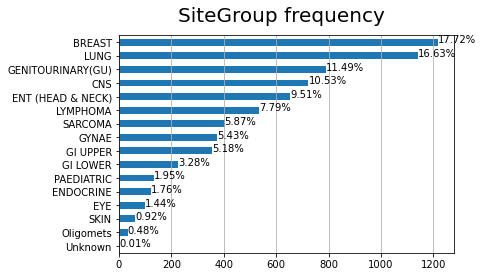

In [192]:
# Moreover, A bar plot is appropriate to understand labels frequency for a single categorical variable. 
x = "SiteGroup"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

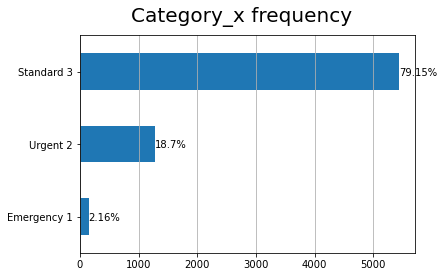

In [193]:
x = "Category_x"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

#### bivariate distribution to understand if SiteGroup has predictive power to predict Y. This would be the case of categorical (Sitegroup_y) vs numerical (Y)

In [239]:
#dtf.dropna(subset=['Sitegroup_y'], inplace=True)
dtf['SiteGroup'].unique()

array(['GENITOURINARY(GU)', 'BREAST', 'GYNAE', 'Oligomets', 'SARCOMA',
       'ENT (HEAD & NECK)', 'LUNG', 'CNS', 'GI LOWER', 'GI UPPER', 'SKIN',
       'LYMPHOMA', 'EYE', 'ENDOCRINE', 'Unknown', 'PAEDIATRIC'],
      dtype=object)

In [240]:
dtf = dtf.loc[dtf['SiteGroup'].isin(['LUNG', 'GENITOURINARY(GU)', 'GASTROINTESTINAL(GI)', 'BREAST',
                                   'GYNAE', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS', 'SARCOMA', 'SKIN',
                                   'ENDOCRINE', 'LEUKEMIA', 'EYE', 'UNKNOWN'])]


In [241]:
dtf.head()


,SiteGroup,Category_x,TltDose,TxFracs,Y
0,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
1,GENITOURINARY(GU),Standard 3,2400.0,3.0,0.0
4,BREAST,Standard 3,4240.0,16.0,4.0
6,GYNAE,Standard 3,2500.0,10.0,4.0
7,BREAST,Standard 3,4240.0,16.0,1.0


/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


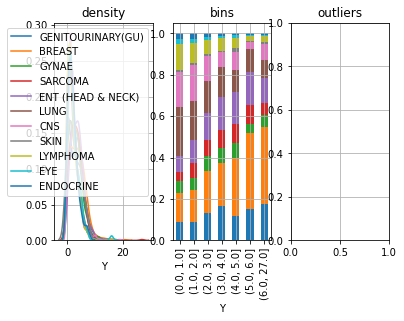

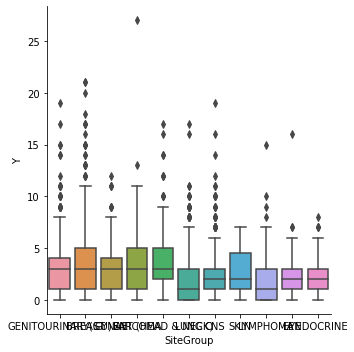

In [197]:
cat, num = "SiteGroup", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

In [198]:
dtf = dtf[dtf['Category_x'].notnull()]
dtf.size

30590

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


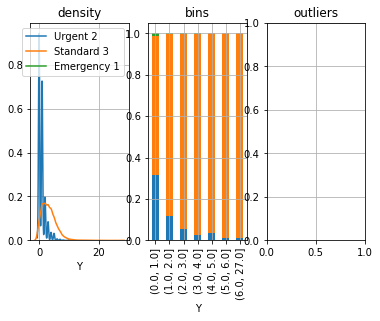

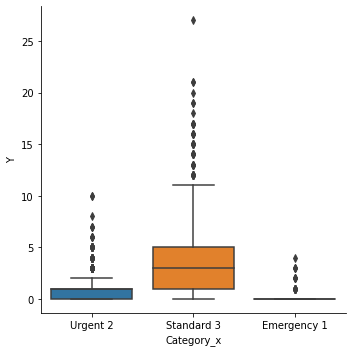

In [199]:
cat, num = "Category_x", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

#### ANOVA tests for features

In [123]:
cat, num = "SiteGroup", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [124]:
cat, num = "Category_x", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


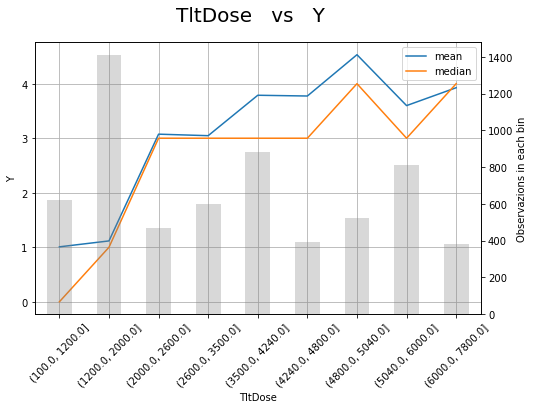

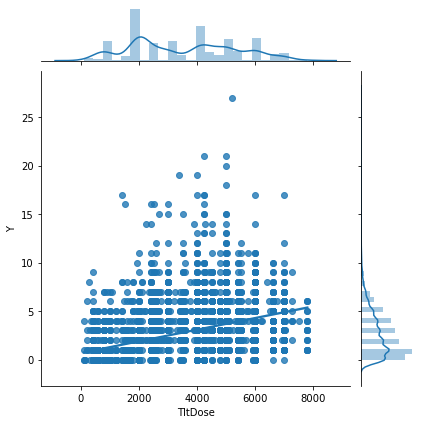

In [125]:
# behavior of the target variable with respect to TltDose 
# This is a case of numerical (TltDose) vs numerical (Y)
x, y = "TltDose", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

In [126]:
### test the correlation between these 2 variables. 
### Since they are both numerical, I’d test the Pearson’s Correlation Coefficient:
x, y = "TltDose", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")


Pearson Correlation: 0.423 Significant (p-value: 0.0)


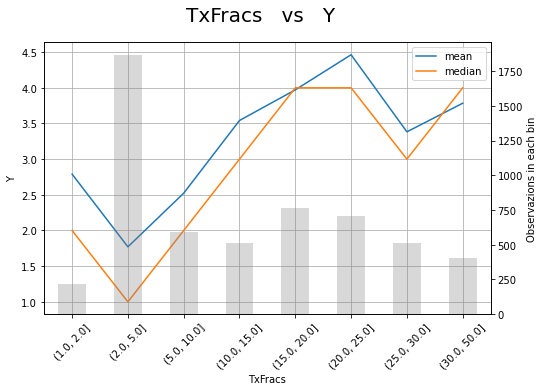

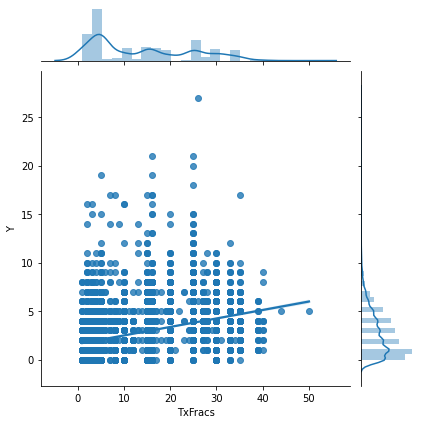

In [127]:
x, y = "TxFracs", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()


In [128]:
x, y = "TxFracs", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.366 Significant (p-value: 0.0)


In [129]:
dtf['product']=dtf['TltDose']*dtf['TxFracs']
dtf['ratio']=dtf['TltDose']/dtf['TxFracs']

In [130]:
x, y = "ratio", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.112 Significant (p-value: 0.0)


In [131]:
x, y = "product", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.335 Significant (p-value: 0.0)


#### Feature Engineering

In [132]:
#sns.catplot(x="Sitegroup_y", y="Y", data=dtf, kind="box")

In [133]:
#dtf.size

### Model

In [242]:
dtf['Category_x'].unique()
#dtf=dtf[dtf['Category_x']!='Planned Delay 3']
#dtf=dtf[dtf['Category_x']!='planned Delay 3']

array(['Urgent 2', 'Standard 3', 'Emergency 1'], dtype=object)

In [243]:
dtf.head()

,SiteGroup,Category_x,TltDose,TxFracs,Y
0,GENITOURINARY(GU),Urgent 2,1600.0,2.0,0.0
1,GENITOURINARY(GU),Standard 3,2400.0,3.0,0.0
4,BREAST,Standard 3,4240.0,16.0,4.0
6,GYNAE,Standard 3,2500.0,10.0,4.0
7,BREAST,Standard 3,4240.0,16.0,1.0


In [203]:
'''x=dtf['ratio']
y=dtf['Y']
plt.scatter(x,y)'''

"x=dtf['ratio']\ny=dtf['Y']\nplt.scatter(x,y)"

In [245]:
dtf.columns

Index(['SiteGroup', 'Category_x', 'TltDose', 'TxFracs', 'Y'], dtype='object')

In [204]:
# train test split
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())


X_train shape: (4282, 4) | X_test shape: (1836, 4)
y_train mean: 2.8 | y_test mean: 2.8
5 features: ['SiteGroup', 'Category_x', 'TltDose', 'TxFracs']


#### Pre-processing

In [207]:
# fill na 
dtf_train["SiteGroup"] = dtf_train["SiteGroup"].fillna(dtf_train["SiteGroup"].mode()[0])
dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
dtf_train["TxFracs"] = dtf_train["TxFracs"].fillna(dtf_train["TxFracs"].median())
#dtf_train["product"] = dtf_train["product"].fillna(dtf_train["product"].median())
#dtf_train["ratio"] = dtf_train["ratio"].fillna(dtf_train["ratio"].median())

dtf_test["SiteGroup"] = dtf_test["SiteGroup"].fillna(dtf_test["SiteGroup"].mode()[0])
dtf_test["TltDose"] = dtf_test["TltDose"].fillna(dtf_test["TltDose"].median())
dtf_test["TxFracs"] = dtf_test["TxFracs"].fillna(dtf_test["TxFracs"].median())
#dtf_test["product"] = dtf_test["product"].fillna(dtf_test["product"].median())
#dtf_test["ratio"] = dtf_test["ratio"].fillna(dtf_test["ratio"].median())


<ipython-input-207-0bfd0d3722ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["SiteGroup"] = dtf_train["SiteGroup"].fillna(dtf_train["SiteGroup"].mode()[0])
<ipython-input-207-0bfd0d3722ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
<ipython-input-207-0bfd0d3722ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [208]:
#from sklearn.preprocessing import OneHotEncoder
## create dummy
dummy = pd.get_dummies(dtf_train[["SiteGroup","Category_x"]], 
                       prefix=['Site','Categ']) #, drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="SiteGroup",axis=1).head() )
## drop the original categorical column
dtf_train = dtf_train.drop(['SiteGroup','Category_x'], axis=1)


              SiteGroup
1108                CNS
2605                CNS
4373           LYMPHOMA
7156  ENT (HEAD & NECK)
8105  GENITOURINARY(GU)


In [140]:
'''
## scale X - test
scalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))
dtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)

## scale Y - test
scalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))
'''

'\n## scale X - test\nscalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\nX = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))\ndtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)\n\n## scale Y - test\nscalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\ndtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))\n'

Text(0.5, 1.0, 'pearson correlation')

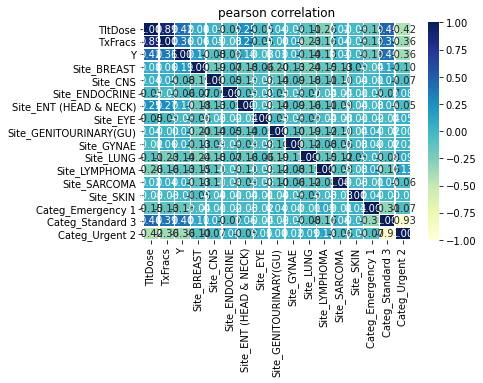

In [209]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")


#### Feature importance

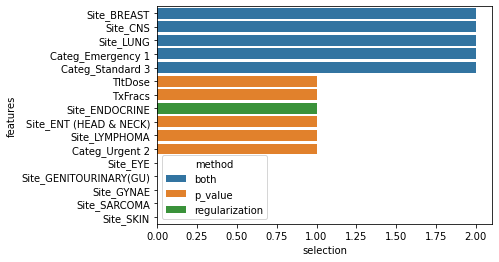

In [210]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

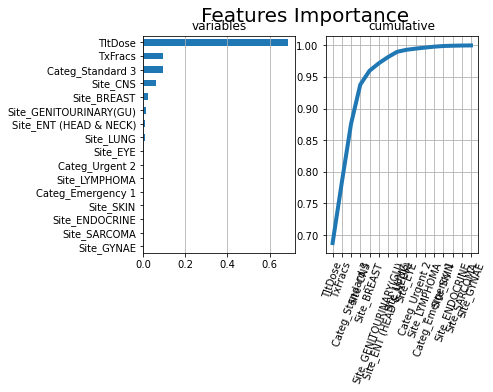

In [211]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()


#### Using some features

In [212]:
X_names = ['TxFracs', 'Site_GASTROINTESTINAL(GI)', 'TltDose', 'Site_BREAST','Categ_Standard 3','Site_CNS','Site_GYNAE',
          'Site_ENT (HEAD & NECK)','Site_SKIN']
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values


KeyError: "['Site_GASTROINTESTINAL(GI)'] not in index"

#### regression models

In [213]:
#dtf=dtf_orig
dtf.columns

Index(['SiteGroup', 'Category_x', 'TltDose', 'TxFracs', 'Y'], dtype='object')

In [214]:
dtf=dtf[['SiteGroup','TltDose','TxFracs','Category_x','Y']]
#dtf['ratio'] = dtf['TltDose']/dtf['TxFracs']
dtf['PlanDur']=dtf['Y']
dtf=dtf.drop(columns = ['PlanDur'])

# fill na 
dtf["SiteGroup"] = dtf["SiteGroup"].fillna(dtf["SiteGroup"].mode()[0])
dtf["TltDose"] = dtf["TltDose"].fillna(dtf["TltDose"].median())
dtf["TxFracs"] = dtf["TxFracs"].fillna(dtf["TxFracs"].median())
#dtf["product"] = dtf["product"].fillna(dtf["product"].median())
#dtf["ratio"] = dtf["ratio"].fillna(dtf["ratio"].median())


In [215]:
dtf.head()

,SiteGroup,TltDose,TxFracs,Category_x,Y
0,GENITOURINARY(GU),1600.0,2.0,Urgent 2,0.0
1,GENITOURINARY(GU),2400.0,3.0,Standard 3,0.0
4,BREAST,4240.0,16.0,Standard 3,4.0
6,GYNAE,2500.0,10.0,Standard 3,4.0
7,BREAST,4240.0,16.0,Standard 3,1.0


In [216]:
# one hot encoding
dummy = pd.get_dummies(dtf[["SiteGroup","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
df_plan = pd.concat([dtf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_plan = df_plan.drop(['SiteGroup','Category_x'], axis=1)

In [217]:
df_plan.columns

Index(['TltDose', 'TxFracs', 'Y', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE',
       'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GENITOURINARY(GU)',
       'Site_GYNAE', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_SARCOMA', 'Site_SKIN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

In [218]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_plan, 
                                                     test_size=0.3)
## print info
print("X_train shape:", df_train.drop('Y',axis=1).shape, "| X_test shape:", df_test.drop('Y',axis=1).shape)
print("y_train mean:", round(np.mean(df_train['Y']),2), "| y_test mean:", round(np.mean(df_test['Y']),2))
print(df_train.shape[1], "features:", df_train.drop('Y',axis=1).columns.to_list())

X_train = df_train.drop('Y', axis=1).values
y_train = df_train['Y'].values

X_test = df_test.drop('Y', axis=1).values
y_test = df_test['Y'].values

X_train shape: (4282, 16) | X_test shape: (1836, 16)
y_train mean: 2.8 | y_test mean: 2.82
17 features: ['TltDose', 'TxFracs', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_SARCOMA', 'Site_SKIN', 'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2']


#### Linear regression

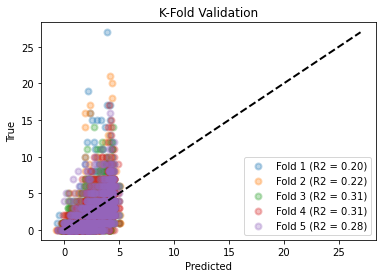

In [219]:
#simple linear regression and use it as a baseline
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()
### The first metric I normally use is the R squared, which indicates
### the proportion of the variance in the dependent variable that is predictable from the independent variable

In [220]:
lrmodel = linear_model.LinearRegression()
lrmodel.fit(X_train, y_train)
y_test_pred = lrmodel.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.123931647536221


#### Gradient Boost regression

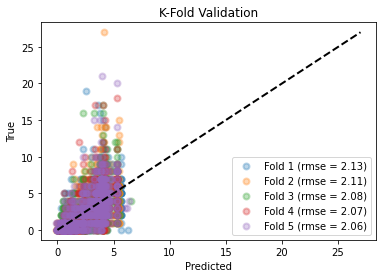

In [221]:
## call model
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
## K fold validation
scores = []
rmse_list = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    #score = metrics.r2_score(true, prediction)
    #scores.append(score)
    rmse = mean_squared_error(true, prediction, squared=False)
    rmse_list.append(rmse)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (rmse = %0.2f)' % (i, rmse))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [222]:
GBmodel = GradientBoostingRegressor(random_state=0)
GBmodel.fit(X_train, y_train)
y_test_pred = GBmodel.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.0064002035945387


#### Ridge regression

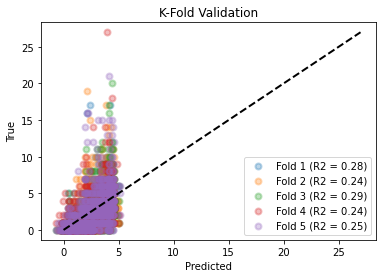

In [223]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict = model.predict(X_train)

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [224]:
rrmodel = linear_model.Ridge()
rrmodel.fit(X_train, y_train)
y_test_pred = rrmodel.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.123887230034924


#### KNN regressor

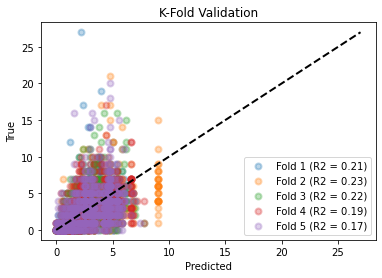

In [225]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

n_neighbors=5
knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = knn.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    #score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()


In [226]:
knnmodel = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knnmodel.fit(X_train, y_train)
y_test_pred = knnmodel.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.1916955563592095


#### SVM regression

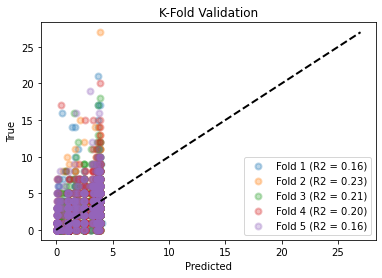

In [227]:
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(X_train,y_train)
y_predict = svm_reg.predict(X_train)

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = svm_reg.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [228]:
y_test_pred = svm_reg.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.194073933619522


#### decision tree regression

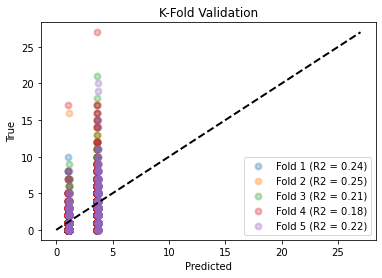

In [229]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y_predict = dec.predict(X_train)

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = dec.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [230]:
y_test_pred = dec.predict(X_test)
rmse = mean_squared_error(y_test_pred, y_test,squared=False)
print(rmse)

2.15740165635904


### Classification

In [ ]:
target_y = "PlanDur2"


In [ ]:
# use more recent data
df_19Oct=df_meet[(pd.to_datetime(df_meet['CreatedDate']).dt.date>=pd.to_datetime("2019-1-01")) 
                &(pd.to_datetime(df_meet['CreatedDate']).dt.year<2020)]
print(df_19Oct.shape)

plt.figure(figsize=[9,5])
bins = range(0,30)

y = df_19Oct[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('days')
plt.ylabel('frequency')
plt.title('PlanDur distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
y = df_19Oct[df_19Oct['Category_x']=='Standard 3'][target_y]

plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('days')
plt.ylabel('frequency')
plt.title('PlanDur distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
y = df_19Oct[df_19Oct['Category_x']=='Urgent 2'][target_y]

plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('days')
plt.ylabel('frequency')
plt.title('PlanDur distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
y = df_19Oct[df_19Oct['Category_x']=='Emergency 1'][target_y]

plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('days')
plt.ylabel('frequency')
plt.title('PlanDur distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
df_19Oct.head()


In [ ]:
df_19Oct['ratio']=df_19Oct['TltDose']/df_19Oct['TxFracs']
#features.append('ratio')


In [ ]:
features

In [ ]:
df_clf = df_19Oct[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
#df_clf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
df_clf.head()


In [ ]:
df_clf.shape


In [ ]:
df_clf = df_clf[df_clf['Sitegroup_y'].notnull()]
df_clf['Sitegroup_y'].unique()


In [ ]:
# Remove outliers in FinalPlanCompl-TxBook
y = df_clf[target_y]
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
index_names = df_clf[~removed_outliers].index 
df_clf_norm = df_clf.drop(index_names)

print(str(len(df_clf_norm.index)) + "/" + str(y.size) + " data points remain.") 

plt.figure(figsize=[9,5])
bins = range(0,25)

y = df_clf_norm[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('planning duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,30)

y = df_clf[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('planning duration')
plt.ylabel('frequency')
plt.title('Planning Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [ ]:
# fill na
df_clf["Sitegroup_y"] = df_clf["Sitegroup_y"].fillna(df_clf["Sitegroup_y"].mode())
df_clf["Category_x"] = df_clf["Category_x"].fillna(df_clf["Category_x"].mode())
df_clf["TltDose"] = df_clf["TltDose"].fillna(df_clf["TltDose"].median())
df_clf["TxFracs"] = df_clf["TxFracs"].fillna(df_clf["TxFracs"].median())
#df_clf[target_y] = df_clf[target_y].fillna(df_clf[target_y].median())


In [ ]:
df_clf[target_y].isna().sum()
df_clf = df_clf[df_clf[target_y].notnull()]
print(df_clf.shape)

In [ ]:
df_test = df_clf[df_clf["Sitegroup_y"].notnull()]
df_test = df_test[df_test["Category_x"].notnull()]
df_test = df_test[df_test["TltDose"].notnull()]
df_test = df_test[df_test["TxFracs"].notnull()]
df_test.shape
df_clf=df_test

In [ ]:
df_clf.isnull().sum()

In [ ]:
# reorganise the classes
# 0-1, class 0; 2-5, class 1, >5, class 2
'''df_clf.loc[df_clf[target_y] <=1, 'WaitTimeGroup'] = 0
df_clf.loc[(df_clf[target_y] <=4)&(df_clf[target_y]>=2), 'WaitTimeGroup'] = 1
df_clf.loc[df_clf[target_y]>=5, 'WaitTimeGroup'] = 2
df_clf = df_clf.drop(columns=[target_y])
'''

In [ ]:
df_clf.head()

In [ ]:
# train-test split
#df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
#print("X_train shape:", df_train.drop('WaitTimeGroup',axis=1).shape, "| X_test shape:", df_test.drop('WaitTimeGroup',axis=1).shape)
#print("y_train mean:", round(np.mean(df_train['WaitTimeGroup']),2), "| y_test mean:", round(np.mean(df_test['WaitTimeGroup']),2))
#print(df_train.shape[1], "features:", df_train.drop('WaitTimeGroup',axis=1).columns.to_list())

In [ ]:
#plt.hist(df_train['TltDose']);


### Trying simple mean method ... Not good

In [ ]:
df_mean = dtf
df_mean.head()

In [ ]:
df_mean['SiteGroup'].unique()

In [ ]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_mean, test_size=0.3)
## print info
print("X_train shape:", df_train.shape, "| X_test shape:", df_test.shape)
print("y_train mean:", round(np.mean(df_train['Y']),2), "| y_test mean:", round(np.mean(df_test['Y']),2))
print(df_train.shape[1], "features:", df_train.drop('Y',axis=1).columns.to_list())

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
mean_train = df_train.groupby(by=['SiteGroup','Category_x'])['Y'].median().reset_index()
#mean_train = mean_train[['Sitegroup_y','Category_x',]]
mean_train.head()

In [ ]:
#from collections import defaultdict
#dict_train = defaultdict(dict)
dict_train = mean_train.set_index(['SiteGroup','Category_x']).to_dict()
#dict_train

In [ ]:
dict_train['Y']

In [ ]:
dict_train['Y'].update({("PAEDIATRIC","Urgent"):0})

In [ ]:
new_list=[]
for index, row in df_test.iterrows():
    #print(row['Sitegroup_y'],row['Category_x'])
    value = dict_train['Y'][(row['SiteGroup'],row['Category_x'])]
    new_list.append(int(value))
#new_list   

In [ ]:
df_test['pred']=new_list
df_test.head()

In [ ]:
# accuracy?
from sklearn.metrics import accuracy_score
#dtree_model.score(df_test[target_y], df_test['pred'])
accuracy_score(df_test['Y'], df_test['pred'])

### dummy

In [ ]:
## create dummy BEFORE train-test-split
dummy = pd.get_dummies(df_clf[["Sitegroup_y","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
dummy.columns


In [ ]:
df_ml = pd.concat([df_clf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_ml = df_ml.drop(['Sitegroup_y','Category_x'], axis=1)
df_ml.head()


In [ ]:
# train-test split
#df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
#print("X_train shape:", df_train.drop("WaitTimeGroup",axis=1).shape, "| X_test shape:", df_test.drop("WaitTimeGroup",axis=1).shape)
#print("y_train mean:", round(np.mean(df_train["WaitTimeGroup"]),2), "| y_test mean:", round(np.mean(df_test["WaitTimeGroup"]),2))
#print(df_train.shape[1], "features:", df_train.drop("WaitTimeGroup",axis=1).columns.to_list())

#### Feature selection

In [ ]:
dic_cols = {col:utils_recognize_type(df_ml, col, max_cat=20) for col in df_ml.columns}
heatmap = df_ml.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [ ]:
### random forest to select features
Y='PlanDur2'
X_train = df_train.drop(Y, axis=1).values
y_train = df_train[Y].values

X_test = df_test.drop(Y, axis=1).values
y_test = df_test[Y].values
feature_names = df_train.drop(Y, axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X_train,y_train)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,30)

y = df_train[Y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel(Y)
plt.ylabel('frequency')
plt.title('Planning distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [ ]:
'''### SMOTE to over sample the training data
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()'''

In [ ]:
X_train.shape


In [ ]:
y_train.shape

In [ ]:
'''
# use some features
X_names = ['TxFracs', 'TltDose', 'Categ_Standard 3','Categ_Urgent 2','Site_CNS', 'Site_GASTROINTESTINAL(GI)',
           'Site_BREAST','Site_ENT (HEAD & NECK)','Site_GENITOURINARY(GU)','Site_SARCOMA','Site_LUNG','Site_GYNAE']
X_train = df_train[X_names].values
y_train = df_train["ContourGroup"].values
X_test = df_test[X_names].values
y_test = df_test["ContourGroup"].values
'''

### Regression model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
plt.style.use('bmh')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [ ]:
### Train-test split for regression model
df_train, df_test = model_selection.train_test_split(df_plan, test_size=0.3)
# print info
print("X_train shape:", df_train.drop("Y",axis=1).shape, "| X_test shape:", df_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Y"]),2), "| y_test mean:", round(np.mean(df_test["Y"]),2))
print(df_train.shape[1], "features:", df_train.drop("Y",axis=1).columns.to_list())

In [ ]:
Y='Y'
X_train = df_train.drop(Y, axis=1).values
y_train = df_train[Y].values

X_test = df_test.drop(Y, axis=1).values
y_test = df_test[Y].values
feature_names = df_train.drop(Y, axis=1).columns.tolist()

In [ ]:
# Standardise data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
y_trainS = sc_Y.fit_transform(y_train.reshape(-1,1))
y_testS = sc_Y.transform(y_test.reshape(-1,1))

In [ ]:
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

In [ ]:
df_train.columns

In [ ]:
df_train.shape

In [ ]:
X_train.shape

In [ ]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['something1','something2','something3','something4','something5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = [['something1','something2','something3','something4','something5']])

# 'Dose', 'Fracs','BREAST','CNS','ENDO','HN','EYE','GI','GU','GYNAE','LEUK','LUNG',
#                         'LYM','PAED','SARC','SKIN','Emergency','Standard','Urgent'

In [ ]:
principalDf['PlanDur'] = y_trainS

In [ ]:
principalDf.shape

#### Quantile regression

In [ ]:
mod = sm.quantreg('PlanDur ~ something1 + something2 + something3 + something4 + something5'
                  , principalDf)
res = mod.fit(q=.5)
print(res.summary())

In [ ]:
# evaluation
pred = res.predict(principalDftest) # make the predictions by the model
y_pred = sc_Y.inverse_transform(pred)

#### Gradient Boosting Regression (median)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
GBRmedian = GradientBoostingRegressor(loss='quantile', alpha=0.5,
                                n_estimators=250, max_depth=5,
                                learning_rate=.1, min_samples_leaf=10,
                                min_samples_split=20)
GBRmedian.fit(X_train, y_train);

In [ ]:
# Make the prediction on the Testing sample
y_pred = GBRmedian.predict(X_test)
y_pred_train = GBRmedian.predict(X_train)

In [ ]:
print('Model Accuracy on Training sample:')
print('RMSLE       = %f' % (mean_squared_error(y_train, y_pred_train)))
print('r-squared   = %f' % (r2_score(y_train, y_pred_train)))

In [ ]:

import seaborn as sns
sns.boxplot(x=y_test)

In [ ]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test, 'b.', markersize=10, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred, 'r-', label='Prediction', alpha = 0.5)
plt.xlabel('Obs')
plt.ylabel('PlanDur')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

In [ ]:
DFyy = pd.DataFrame({'y_test':y_test,'y_pred': y_pred})
DFyy.sort_values(by=['y_test'],inplace=True)
plt.plot(np.arange(0,len(DFyy),1), DFyy['y_pred'])
plt.plot(np.arange(0,len(DFyy),1), DFyy['y_test'], alpha=0.5)
#plt.ylim(0,500000)
plt.ylabel('Red= y_test,  Blue = y_pred')
plt.xlabel('Index ')
plt.title('Predicted vs. Real');
print('Observations sorted by y_test values, i.e. higher index => higher SalePrice value');

In [ ]:
plt.scatter(y_test, y_pred)
plt.ylim(-1, 30)
plt.xlim(-1, 30)
plt.plot(y_test, y_test, "r")
plt.xlabel('y_actual')
plt.ylabel('y_predicted');

### Classification models

In [ ]:
Y=target_y
plt.figure(figsize=[9,5])
bins = range(0,30)

y = df_ml[Y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel(Y)
plt.ylabel('frequency')
plt.title('Planning distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
# quantiles
np.quantile(df_ml[target_y], [0.25,0.5,0.75])


In [ ]:
# reorganise the classes
# 0-1, class 0; 2-5, class 1, >5, class 2
df_ml.loc[df_ml[target_y] <=1, 'Group'] = 0
df_ml.loc[(df_ml[target_y] <=3)&(df_ml[target_y]>=2), 'Group'] = 1
df_ml.loc[(df_ml[target_y] <=6)&(df_ml[target_y]>=4), 'Group'] = 2
df_ml.loc[df_ml[target_y] >= 7, 'Group']=3

df_ml = df_ml.drop(columns=[target_y])


In [ ]:
# train-test split
Y="Group"
df_train, df_test = model_selection.train_test_split(df_ml, test_size=0.3)
## print info
print("X_train shape:", df_train.drop(Y,axis=1).shape, "| X_test shape:", df_test.drop(Y,axis=1).shape)
print("y_train mean:", round(np.mean(df_train[Y]),2), "| y_test mean:", round(np.mean(df_test[Y]),2))
print(df_train.shape[1], "features:", df_train.drop(Y,axis=1).columns.to_list())


#### Decision Tree

In [ ]:
#Y='WaitTimeGroup'
X_train = df_train.drop(Y, axis=1).values
y_train = df_train[Y].values

X_test = df_test.drop(Y, axis=1).values
y_test = df_test[Y].values
feature_names = df_train.drop(Y, axis=1).columns.tolist()


In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
df_train['Group'].hist()

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#mdl_dt = tree.DecisionTreeClassifier(max_depth=6)
#mdl_dt = mdl_dt.fit(X, y)

param_grid = {'max_depth': np.arange(3, 20),
              'max_features': np.arange(1,20),
              'min_samples_split': np.arange(2,10)
             }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1, class_weight='balanced'), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
dtree_model = DecisionTreeClassifier(max_depth=GS.best_params_['max_depth'], 
                                     max_features=GS.best_params_['max_features'],
                                    min_samples_split=GS.best_params_['min_samples_split'],
                                    class_weight='balanced').fit(X_train, y_train)
y_test_pred = dtree_model.predict(X_test)
y_pred = sc_Y.inverse_transform(y_test_pred)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


In [ ]:
print(cm)
print(classification_report(y_test, y_test_pred))


In [ ]:
dtree_model.score(X_train, y_train) # m
ean accuracy

In [ ]:
dtree_model.score(X_test, y_test)
# accuracy_score(y_test, y_test_pred)


In [ ]:
y_test

In [ ]:
y_test_pred

In [ ]:
instance = pd.read_excel("instance_20200109.xlsx", sheet_name='Sheet2')
instance.head()

In [ ]:
ins = instance[['Dosage','Fracs','Sitegroup_y','Category']]

In [ ]:
## create dummy
dummy = pd.get_dummies(ins[["Sitegroup_y","Category"]], prefix=['Site','Categ']) #, drop_first=True)
dummy.columns

In [ ]:
ins = pd.concat([ins, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
ins = ins.drop(['Sitegroup_y','Category'], axis=1)
ins.head()

In [ ]:
df_test.head()

In [ ]:
ins['Planning']=dtree_model.predict(ins)

#### other classifiers

In [ ]:
'''
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

print(accuracy)
print(cm)
print(classification_report(y_test, svm_predictions))
'''

In [ ]:
'''# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_train, y_train)
print("Training accuracy:" , accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)'''

In [ ]:
'''test_score = knn.score(X_test, y_test)
print("testing accuracy:" , test_score)'''

In [ ]:
'''print(cm)
print(classification_report(y_test, knn_predictions))'''

In [ ]:
'''# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)'''

#### random forest

In [ ]:
### Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred = clf_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
              'max_features': np.arange(3,10)
              #'min_samples_split': np.arange(2,10)
                  }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
# evaluate random search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

'''Model Performance
Average Error: 3.9199 degrees.
Accuracy = 93.36%.'''



In [ ]:
base_model.score(X_test, y_test)

In [ ]:
rf_random.best_estimator_

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
rf_random.score(X_test, y_test)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [10, 12, 15],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
y_rf_pred=grid_search.predict(X_test)
cm_rf = confusion_matrix(y_test, y_rf_pred)

In [ ]:
print(cm_rf)
print(classification_report(y_test, y_rf_pred))

#### Planning wait

In [ ]:
preTxDur.columns

In [ ]:
#remove outliers
preTxDur[preTxDur['Tx-TxBook']>-20]['Tx-TxBook'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[preTxDur['PlanningWait']>-20].PlanningWait
y = df_exceed[df_exceed['PlanningWait']>-20].PlanningWait
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning wait time frm contouring')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Seems the treatments are often pre-booked

In [ ]:
preTxDur[(preTxDur['WT Tx Frm Created']>-20)&(preTxDur['WT Tx Frm Created']<50)]['WT Tx Frm Created'].hist()
